                 Block                Primary Type  \
0    082XX S COLES AVE                       THEFT   
1      004XX W 42ND PL               OTHER OFFENSE   
2  025XX N KIMBALL AVE  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST                       THEFT   
4   111XX S NORMAL AVE                       THEFT   

                      Description Location Description  Arrest  Domestic  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False     False   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False      True   
2   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False     False   
3   FINANCIAL ID THEFT: OVER $300                OTHER   False     False   
4  FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False     False   

   Beat  District  Ward  Community Area    Year   Latitude  Longitude  Month  \
0   424       4.0   7.0            46.0  2004.0        NaN        NaN    1.0   
1   935       9.0  11.0            61.0  2003.0  41.817229

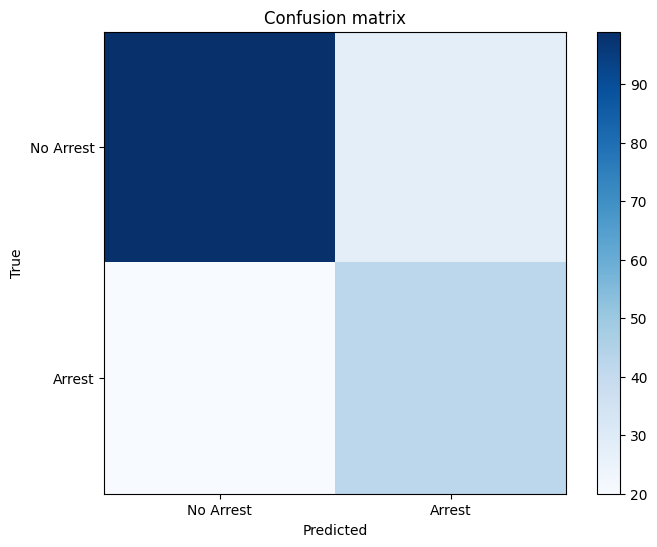

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the crime data into a DataFrame
crime_data = pd.read_csv('/content/Chicago_Crimes_2001_to_2016.csv')

# Explore the data
print(crime_data.head())

# Data preprocessing
# Check for missing values and handle them appropriately
crime_data.dropna(inplace=True)

# Encode categorical variables if needed (e.g., using one-hot encoding)
crime_data = pd.get_dummies(crime_data, columns=['Primary Type', 'Description', 'Location Description'])

# Feature selection
# Remove the original categorical columns as they are replaced by one-hot encoding
features = ['Domestic', 'Beat'] + [col for col in crime_data.columns if col.startswith('Primary Type_') or col.startswith('Description_')]

# Ensure the target variable 'Arrest' is binary (0 or 1)
crime_data['Arrest'] = crime_data['Arrest'].astype(int)

# Split the data into features and target variable (arrest)
X = crime_data[features]
y = crime_data['Arrest']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Classifier, for example)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Arrest', 'Arrest'])
plt.yticks([0, 1], ['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Function to take user input and predict arrest
def predict_arrest(primary_type, description, domestic, beat):
    # Create a dictionary with input values
    input_data = {
        'Domestic': domestic,
        'Beat': beat
    }
    # Add one-hot encoded Primary Type and Description columns, setting all to 0 initially
    for col in [col for col in X.columns if col.startswith('Primary Type_') or col.startswith('Description_')]:
        input_data[col] = 0
    # Set the column corresponding to the provided primary type and description to 1
    primary_type_column = f'Primary Type_{primary_type.upper()}'
    description_column = f'Description_{description.upper()}'
    if primary_type_column in input_data:
        input_data[primary_type_column] = 1
    else:
        print(f"Primary Type '{primary_type}' not found in the data.")
        return None
    if description_column in input_data:
        input_data[description_column] = 1
    else:
        print(f"Description '{description}' not found in the data.")
        return None

    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict the arrest outcome
    prediction = rf_classifier.predict(input_df)

    return 'Arrest' if prediction[0] else 'No Arrest'

# Function to safely get user input
def get_user_input():
    try:
        primary_type = input("Enter the Primary Type of the crime: ")
        description = input("Enter the Description of the crime: ")
        domestic = int(input("Enter 1 if Domestic, 0 otherwise: "))
        beat = int(input("Enter the Beat number: "))
        return primary_type, description, domestic, beat
    except KeyboardInterrupt:
        print("\nOperation cancelled by user.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Get user input and make a prediction
user_input = get_user_input()
if user_input:
    primary_type, description, domestic, beat = user_input
    arrest_prediction = predict_arrest(primary_type, description, domestic, beat)
    if arrest_prediction:
        print(f"Prediction for primary type '{primary_type}' with description '{description}': {arrest_prediction}")
